In [18]:
import tifffile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, cohen_kappa_score

In [19]:
with tifffile.TiffFile("../dataset/labeled_data/train/train_XZ/tr_orig_XZ.tif") as tif:
    print("TRAIN", tif.pages[0].sizes)
    train_data = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/train/train_XZ/tr_seg_XZ.tif") as tif:
    train_labels = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/test/test_YZ/test_orig_YZ.tif") as tif:
    print("TEST", tif.pages[0].sizes)
    test_data = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/test/test_YZ/test_seg_YZ.tif") as tif:
    test_labels = tif.asarray()

TRAIN {'height': 600, 'width': 600}
TEST {'height': 425, 'width': 425}


In [20]:
train_data = (train_data / 255).reshape((-1, 1))
train_labels = train_labels.flatten().astype(np.int8)
test_data = (test_data / 255).reshape((-1, 1))
test_labels = test_labels.flatten().astype(np.int8)

In [21]:
def remove_zero_labels(x, y):
    mask = y != 0
    X = x[mask]
    Y = y[mask] - 1
    return X, Y

In [22]:
X_train, Y_train = remove_zero_labels(train_data, train_labels)
X_test, Y_test = remove_zero_labels(test_data, test_labels)

In [23]:
def predict_and_plot(model):
    train_preds = eval(model, train_data, train_labels, "train")
    test_preds = eval(model, test_data, test_labels, "test")

    plt.subplot(2, 2, 1)
    pred_img = train_preds.reshape((600, 600)) + 1
    plt.imshow(pred_img)

    plt.subplot(2, 2, 2)
    gt_img = train_labels.reshape((600, 600))
    plt.imshow(gt_img)

    plt.subplot(2, 2, 3)
    pred_img = test_preds.reshape((425, 425)) + 1
    plt.imshow(pred_img)

    plt.subplot(2, 2, 4)
    gt_img = test_labels.reshape((425, 425))
    plt.imshow(gt_img)

def eval(model, x, y, prefix):
    p_preds = model.predict_proba(x)
    preds = np.argmax(p_preds, axis=1)

    P, Y = remove_zero_labels(preds, y)

    print(f"Precision {prefix}", precision_score(Y, P, average="macro"))
    print(f"Recall {prefix}", recall_score(Y, P, average="macro"))
    print(f"F1 {prefix}", f1_score(Y, P, average="macro"))
    print(f"AP {prefix}", average_precision_score(Y, p_preds[y != 0], average="macro"))
    print(f"Kappa {prefix}", cohen_kappa_score(Y, P))

    return preds

/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision train 0.2696797411711054
Recall train 0.3155529687730818
F1 train 0.28918554886834286
AP train 0.35395990318041587
Kappa train 0.697442169415615
Precision test 0.25649577776715615
Recall test 0.3137423997120174
F1 test 0.2781747394503172
AP test 0.34540367337161526
Kappa test 0.6559980327578616


/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


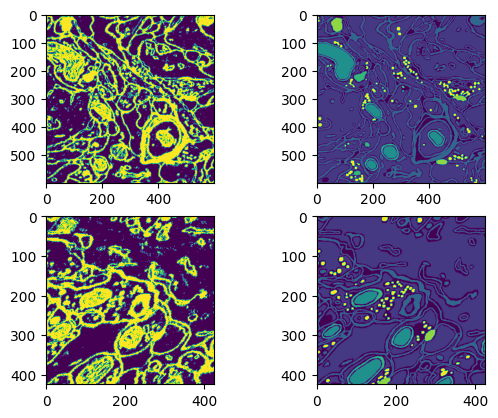

In [24]:
tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)

predict_and_plot(tree)

/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision train 0.2696797411711054
Recall train 0.3155529687730818
F1 train 0.28918554886834286
AP train 0.35393527089982396
Kappa train 0.697442169415615


/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision test 0.25649577776715615
Recall test 0.3137423997120174
F1 test 0.2781747394503172
AP test 0.34533732052525945
Kappa test 0.6559980327578616


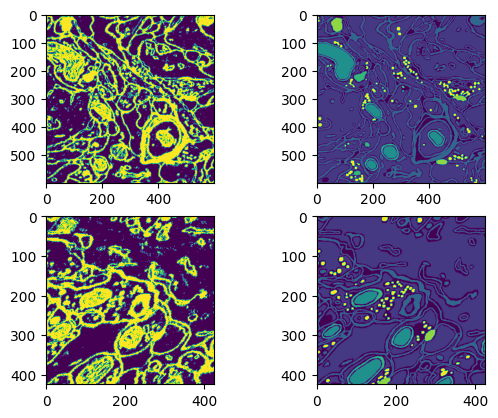

In [25]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

predict_and_plot(rf)

/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision train 0.2694519227408875
Recall train 0.3164406642479396
F1 train 0.2889077847330806
AP train 0.23254760466401
Kappa train 0.697047051203664


/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision test 0.255891124734741
Recall test 0.31473436334628424
F1 test 0.2773765960941143
AP test 0.21917517383010157
Kappa test 0.6537897431514439


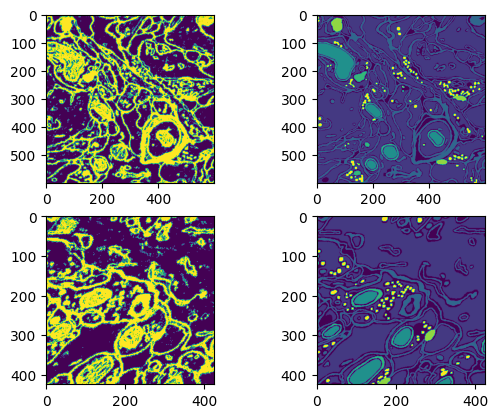

In [26]:
ab = AdaBoostClassifier()

ab.fit(X_train, Y_train)

predict_and_plot(ab)

/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision train 0.2696797411711054
Recall train 0.3155529687730818
F1 train 0.28918554886834286
AP train 0.3538422887728316
Kappa train 0.697442169415615


/home/shov/miniconda3/envs/volume/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision test 0.25649577776715615
Recall test 0.3137423997120174
F1 test 0.2781747394503172
AP test 0.34580785997587454
Kappa test 0.6559980327578616


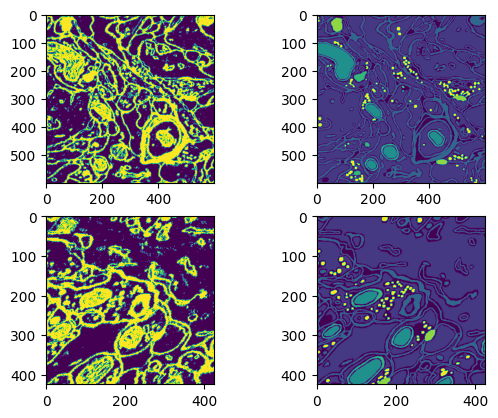

In [27]:
gb = GradientBoostingClassifier()

gb.fit(X_train, Y_train)

predict_and_plot(gb)